In [45]:
from src.dataset import get_mnist_loaders
from src.model import SimpleCNN
from src.train import evaluate
import torch
import matplotlib.pyplot as plt
import torchvision
from torchinfo import summary

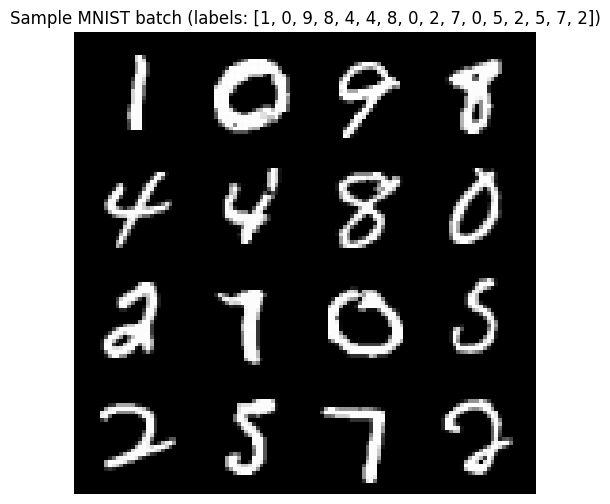

In [46]:
# Setting up train, test and plotting a sample of digits
train_loader, test_loader = get_mnist_loaders(batch_size=16)
images, labels = next(iter(train_loader))

grid = torchvision.utils.make_grid(images[:16], nrow=4, normalize=True, padding=2)

plt.figure(figsize=(6,6))

plt.imshow(grid.permute(1, 2, 0), cmap='gray')
plt.title('Sample MNIST batch (labels: {})'.format(labels[:16].tolist()))
plt.axis('off')
plt.show()

In [47]:
# Model summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

summary(model, input_size=(1,1,28,28), col_names=["input_size","output_size", "num_params"], col_width = 16, row_settings=["var_names"])

Layer (type (var_name))                  Input Shape      Output Shape     Param #
SimpleCNN (SimpleCNN)                    [1, 1, 28, 28]   [1, 10]          --
├─Conv2d (conv1)                         [1, 1, 28, 28]   [1, 16, 28, 28]  160
├─Conv2d (conv2)                         [1, 16, 14, 14]  [1, 32, 14, 14]  4,640
├─Conv2d (conv3)                         [1, 32, 7, 7]    [1, 64, 7, 7]    18,496
├─Linear (fc1)                           [1, 576]         [1, 128]         73,856
├─Linear (fc2)                           [1, 128]         [1, 10]          1,290
Total params: 98,442
Trainable params: 98,442
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.39
Estimated Total Size (MB): 0.57

In [48]:
# Loading the best model from training
ckpt = "../models/best_model.pth"
state = torch.load(ckpt, map_location=device)
model.load_state_dict(state)
model.eval()
print(f"Loaded checkpoint is at {ckpt}")

Loaded checkpoint is at ../models/best_model.pth


In [51]:
# Check the accuracy of the best model
acc = evaluate(model, test_loader, device)
print(f"Test accuracy: {acc:.2f}%")

Test accuracy: 99.03%


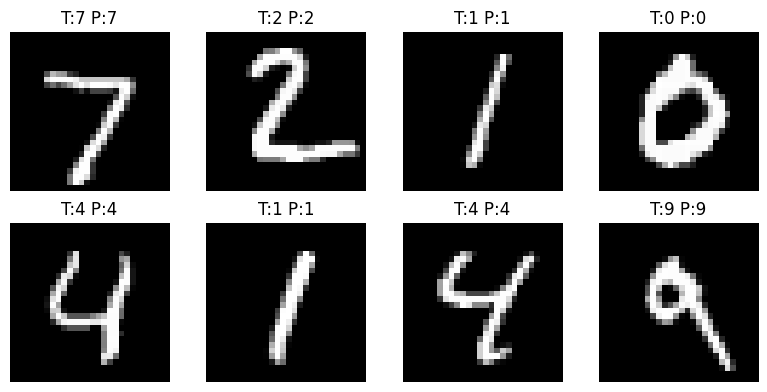

In [50]:
# Plotting a few predictions
images, labels = next(iter(test_loader))
outputs = model(images.to(device))
_, predictions = torch.max(outputs, 1)

plt.figure(figsize=(8,4))
for i in range(8):
    ax = plt.subplot(2,4,i+1)
    ax.imshow(images[i, 0], cmap = "gray")
    ax.set_title(f"T:{labels[i].item()} P:{predictions[i].item()}")
    ax.axis("off")
plt.tight_layout()
plt.show()
